In [57]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Define the polynomial function
def polynomial(x):
    return 2 * x**3 + 3 * x**2 - 5 * x + 2

# Generate random training data
np.random.seed(0)
X_train = np.random.uniform(low=-10, high=10, size=(1000,))
y_train = polynomial(X_train)

# Generate random validation data
X_val = np.random.uniform(low=-10, high=10, size=(100,))
y_val = polynomial(X_val)

# Generate random test data
X_test = np.random.uniform(low=-10, high=10, size=(100,))
y_test = polynomial(X_test)

# Define the model
model = keras.Sequential([
    layers.InputLayer(input_shape=[1]),
    layers.Dense(800, activation='sigmoid'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=600,
    batch_size=50,
    verbose=1
)

# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test)

# Generate test data of actual
# and predicted values for plotting
X_test.sort() #sort list since we picked them randomly
y_plot = polynomial(X_test)
y_pred = model.predict(X_test)

Epoch 1/600
20/20 [==============================] - 0s 7ms/step - loss: 571747.5625 - val_loss: 746781.9375
Epoch 2/600
20/20 [==============================] - 0s 2ms/step - loss: 568583.7500 - val_loss: 743528.5000
Epoch 3/600
20/20 [==============================] - 0s 2ms/step - loss: 564968.2500 - val_loss: 739248.8125
Epoch 4/600
20/20 [==============================] - 0s 2ms/step - loss: 560281.0625 - val_loss: 733717.3750
Epoch 5/600
20/20 [==============================] - 0s 2ms/step - loss: 554516.5625 - val_loss: 726650.9375
Epoch 6/600
20/20 [==============================] - 0s 2ms/step - loss: 547866.3125 - val_loss: 718002.1875
Epoch 7/600
20/20 [==============================] - 0s 2ms/step - loss: 539819.4375 - val_loss: 708339.1875
Epoch 8/600
20/20 [==============================] - 0s 2ms/step - loss: 531062.7500 - val_loss: 697976.5625
Epoch 9/600
20/20 [==============================] - 0s 2ms/step - loss: 521685.2812 - val_loss: 687066.8750
Epoch 10/600
20/20 

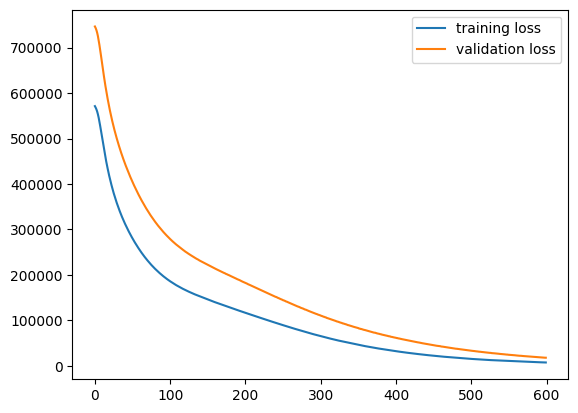

In [55]:
# Plot the development of the loss function during training
plt.figure()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

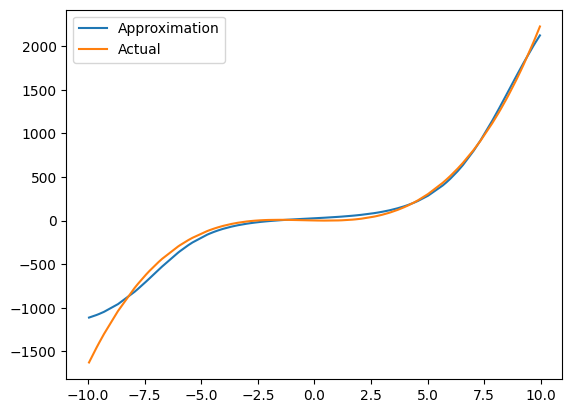

In [56]:
# Plot predicted values and test data
plt.plot(X_test, y_pred, label='Approximation')
plt.plot(X_test, y_plot, label='Actual')
plt.legend()
plt.show()